In [1]:
import bokeh
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

from   astropy.table import Table
from   astropy.cosmology import FlatLambdaCDM
from   scipy.spatial.transform import Rotation as R
from   bokeh.models import CustomJS, Dropdown
from   bokeh.plotting import figure, output_file, save, show
from   bokeh.io import output_notebook
from   bokeh.transform import linear_cmap
from   bokeh.palettes import Spectral6
from   bokeh.models import ColorBar, ColumnDataSource
from   bokeh.embed import file_html
from   bokeh.models import Range1d
from   bokeh.models import Panel, Tabs

In [2]:
cosmo = FlatLambdaCDM(H0=100, Om0=0.3, Tcmb0=2.725)

In [3]:
data = Table.read('/Users/MJWilson/Downloads/MXXL_sampled_theory.csv')

In [4]:
data

MOCKRA,MOCKDEC,Z,ZOBS,RMAG_DRED,GTYPE,HMASS,NMOCK,TILEID,ROSETTE,TARGETID,SUBPRIORITY,COMPLETENESS_VAL,SUBPRIORITY_Z,Z_SIGMOID_VAL,w_complete,w_zsuccess,w_stellar,WEIGHT,TARGET_RA,TARGET_DEC,M_R,G-R_REST,V,VMAX,DDP1,DDP2,DDP3,D_L,N_NEIGHBOUR,RHO,DELTA_8,HALOID
float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,str5,str5,str5,float64,float64,float64,float64,int64
164.91493225097656,17.952428817749023,0.23712143301963806,0.237184539437294,18.201082229614258,0.0,149.95755004882812,0,39,1,1535581,0.3745401188473625,0.9,0.3745401188473625,0.9989899585032578,0.9,0.9989899585032578,1,1.1122345141244858,179.51255893669426,0.5685683332977192,-21.481977462768555,0.876566469669342,1302465601.5319345,4674803277.842229,False,False,False,838.1190671242382,0.0,0.0,-1.0,211731429
133.02806091308594,25.883146286010742,0.29792678356170654,0.2962743937969208,18.58922576904297,0.0,394.4458312988281,0,15,0,1535623,0.7319939418114051,0.9,0.9507143064099162,0.996770916734867,0.9,0.996770916734867,1,1.11471060446947,149.0021799297215,2.1082832687180257,-21.792705535888672,0.9962792992591858,2482027188.6801558,5706177599.812308,False,False,False,1090.1592473773271,0.0,0.0,-1.0,116145350
166.369873046875,16.8646183013916,0.2822915315628052,0.2817038893699646,19.382097244262695,0.0,104.00762176513672,0,41,1,1535625,0.5986584841970366,0.9,0.7319939418114051,0.9662260581401567,0.9,0.9662260581401567,1,1.1499494365219636,181.1664423591268,-0.04410860596465227,-20.568073272705078,0.41689425706863403,2133444892.57223,4541968330.779697,False,False,False,1024.0430779368521,0.0,0.0,-1.0,674961177
134.0104522705078,26.402814865112305,0.27277976274490356,0.2719270884990692,18.809417724609375,0.0,809.1316528320312,0,12,0,1535630,0.15601864044243652,0.9,0.5986584841970366,0.9937676306024735,0.9,0.9937676306024735,1,1.1180793949159904,149.82281349544223,2.7210924332967323,-21.292713165283203,0.9343969225883484,1937109393.5342243,3804266780.245596,False,False,False,984.2581162448303,0.0,0.0,-1.0,298704836
134.00328063964844,24.885780334472656,0.24533261358737946,0.2458038032054901,18.655372619628906,0.0,261.3223876953125,0,13,0,1535635,0.15599452033620265,0.9,0.15601864044243652,0.9960649235941149,0.9,0.9960649235941149,1,1.1155006915632302,149.98717328441066,1.2129628592161907,-21.14593505859375,0.9580559134483337,1434827324.2468877,3281702455.6519947,False,False,False,871.3443104001049,0.0,0.0,-1.0,472142037
168.45486450195312,15.28649616241455,0.24233701825141907,0.24263954162597656,18.985774993896484,0.0,159.9834747314453,0,70,2,1535687,0.05808361216819946,0.9,0.15599452033620265,0.9894672270926684,0.9,0.9894672270926684,1,1.1229387701661089,183.56363352439195,-0.9147228922214481,-20.790910720825195,1.0082412958145142,1385608230.387123,2269992346.0908127,False,False,False,859.1931971283977,0.0,0.0,-1.0,213553563
164.6425018310547,16.227643966674805,0.06410904228687286,0.06379252672195435,16.309646606445312,0.0,91.2822036743164,0,43,1,1535724,0.8661761457749352,0.9,0.05808361216819946,0.999996528985528,0.9,0.999996528985528,1,1.1111149678072445,179.78283806916608,-1.1546964455202442,-20.0694580078125,0.9177533388137817,28651842.716292165,1091500953.7256474,False,True,False,202.01281068435742,0.0,0.0,-1.0,347785030
133.66180419921875,26.201282501220703,0.3286536633968353,0.3302965462207794,19.499210357666016,0.0,273.1694641113281,0,18,0,1535735,0.6011150117432088,0.9,0.8661761457749352,0.9526810323664885,0.9,0.9526810323664885,1,1.166299184472139,149.53435131441728,2.4860059350250054,-21.196041107177734,1.0186915397644043,3264008085.92191,3355873290.8409534,False,False,False,1222.642992113173,0.0,0.0,-1.0,296610265
167.81536865234375,14.698850631713867,0.19446685910224915,0.19644318521022797,17.798128128051758,0.0,869.1846313476562,0,70,2,1535830,0.7080725777960455,0.9,0.6011150117432088,0.9996982517234914,0.9,0.9996982517234914

Text(0, 0.5, 'ZOBS')

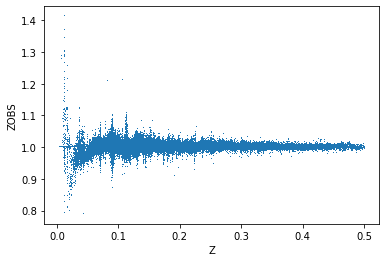

In [5]:
pl.plot(data['Z'], data['ZOBS'] / data['Z'], marker=',', lw=0.0)

pl.xlabel('Z')
pl.ylabel('ZOBS')

In [6]:
data = data[data['ROSETTE'] == 15]

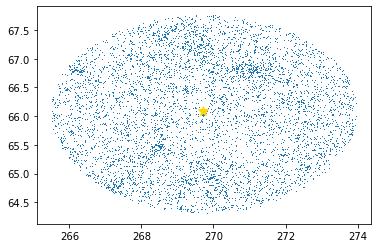

In [7]:
pl.plot(data['TARGET_RA'], data['TARGET_DEC'], marker=',', lw=0.0)

pl.plot(np.median(data['TARGET_RA']), np.median(data['TARGET_DEC']), marker='*', lw=0.0, color='gold', markersize=10)

In [8]:
phi   = np.radians(data['MOCKRA'].data)
theta = np.pi/2. - np.radians(data['MOCKDEC'].data)

In [9]:
chis  = cosmo.comoving_distance(data['Z']).value # Mpc/h

In [10]:
zs    = chis * np.cos(theta)
ys    = chis * np.sin(theta) * np.sin(phi)
xs    = chis * np.sin(theta) * np.cos(phi)

In [11]:
pos   = np.c_[xs, ys, zs]
pos.shape

(6441, 3)

In [12]:
# pos[:,2] = 0.0
# pos[:,1] = np.random.uniform(0.,1.,size=len(pos))
# pos[:,0] = 0.0

In [13]:
pos

array([[  31.13851626, -384.71802226,  381.49801989],
       [  14.46978597, -245.88400063,  249.59580862],
       [  57.00842436, -684.16278587,  709.70752747],
       ...,
       [   3.92985175, -131.64341939,  129.66411472],
       [   6.35060086, -124.6089875 ,  125.59571868],
       [  28.26103076, -417.86759335,  441.5982553 ]])

In [14]:
mean_phi   = np.median(phi)
mean_theta = np.median(theta)

np.degrees(mean_phi), np.degrees(np.pi/2. - mean_theta)

(273.59808349609375, 45.65898132324219)

In [15]:
rot   = R.from_rotvec(-mean_phi * np.array([0, 0, 1]))

In [16]:
res   = rot.apply(pos)

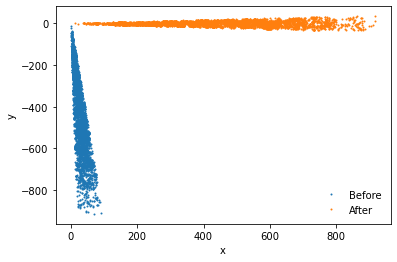

In [17]:
fig   = plt.figure()

ax    = fig.add_subplot()

ax.plot(pos[:,0], pos[:,1], marker='.', lw=0.0, label='Before', markersize=2.)
ax.plot(res[:,0], res[:,1], marker='.', lw=0.0, label='After', markersize=2.)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.legend(frameon=False, loc=4)

In [18]:
# pos[:,2] = np.random.uniform(0.,1.,size=len(pos))
# pos[:,1] = np.random.uniform(0.,1.,size=len(pos))
# pos[:,0] = 0.0

In [19]:
rot      = R.from_rotvec((np.pi/2. - mean_theta) * np.array([0, 1, 0]))

In [20]:
resres   = rot.apply(res)

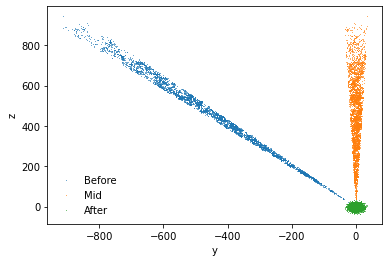

In [21]:
fig      = plt.figure()

ax       = fig.add_subplot()

ax.scatter(pos[:,1],       pos[:,2], marker='.', lw=0.0, label='Before', s=2.)
ax.scatter(res[:,1],       res[:,2], marker='.', lw=0.0, label='Mid', s=2.)
ax.scatter(resres[:,1], resres[:,2], marker='.', lw=0.0, label='After',  s=2.)

ax.set_xlabel('y')
ax.set_ylabel('z')

pl.legend(frameon=False, loc=3)

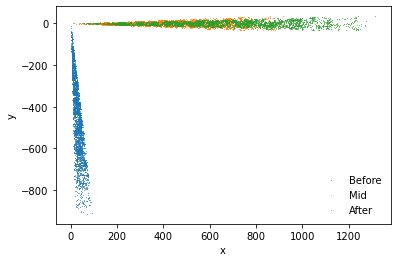

In [22]:
fig      = plt.figure()

ax       = fig.add_subplot()

ax.scatter(pos[:,0],       pos[:,1], marker='.', lw=0.0, label='Before', s=2.)
ax.scatter(res[:,0],       res[:,1], marker='.', lw=0.0, label='Mid', s=2.)
ax.scatter(resres[:,0], resres[:,1], marker='.', lw=0.0, label='After',  s=2.)

ax.set_xlabel('x')
ax.set_ylabel('y')

pl.legend(frameon=False, loc=4)

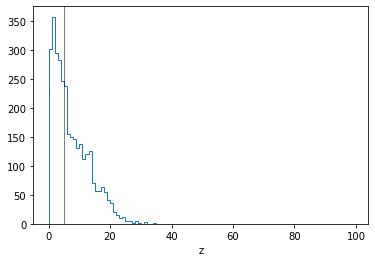

In [23]:
_ = pl.hist(resres[:,2], histtype='step', bins=np.arange(0., 100., 1.))
pl.xlabel('z')
pl.axvline(5., c='k', lw=0.5)

In [24]:
deltas = data['DELTA_8']

In [25]:
deltas.min()

-1.0

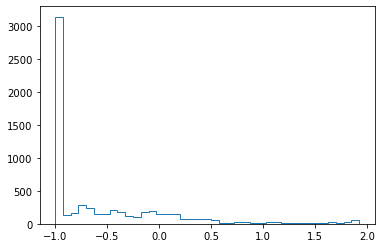

In [26]:
_ = pl.hist(deltas, histtype='step', bins=np.arange(-1., 2., 0.075))

In [27]:
# 5Mpc slice.
isin = (resres[:,2] < 5.)

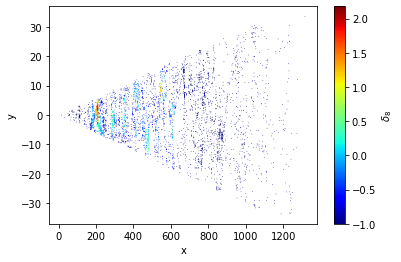

In [28]:
pl.scatter(resres[isin,0], resres[isin,1], c=deltas[isin], marker='.', lw=0.0,  s=2., cmap='jet')

pl.xlabel('x')
pl.ylabel('y')

pl.colorbar(label=r'$\delta_8$')

In [29]:
np.mean(isin)

0.7256637168141593

In [30]:
# output_notebook()

In [39]:
# set output to static HTML file
output_file(filename="example_bokeh_delta8.html", title="Example Bokeh delta8")

In [40]:
np.sort(data['VMAX'].data)

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       1.01684240e+10, 1.01728296e+10, 1.01741147e+10])

In [41]:
# 5Mpc slice.
isin   = (resres[:,2] < 5.)

In [42]:
data['VMAX'][data['VMAX'] == 0.0] = 1.0

In [43]:
vmax_fails = data['VMAX'] == 1.0

In [50]:
source = ColumnDataSource(dict(x=resres[isin,0],\
                               y=resres[isin,1],\
                               delta8=deltas[isin],\
                               n_neighbour=data['N_NEIGHBOUR'][isin],\
                               rho=data['RHO'][isin],\
                               log10vmax=np.log10(data['VMAX'][isin]),\
                               ddp1=data['DDP1'][isin] == 'True',\
                               ddp2=data['DDP2'][isin] == 'True',\
                               ddp3=data['DDP3'][isin] == 'True',\
                               log10hmass=np.log10(data['HMASS'][isin]),\
                               weight=data['WEIGHT'][isin],\
                               MR=data['M_R'][isin],\
                               rest_gmr=data['G-R_REST'][isin],\
                               redshift=data['Z'][isin],\
                               galaxy_type=data['GTYPE'][isin],\
                               vmax_fails=vmax_fails[isin],\
                               rmag=data['RMAG_DRED'][isin]))

In [51]:
tabs = []

tabnames = source.column_names 
tabnames.remove('x')
tabnames.remove('y')

for i, tabname in enumerate(tabnames):
    try:
        colordata = source.data[tabname].data.astype(float)
    
    except:
        colordata = source.data[tabname].astype(float)
        
    mapper    = linear_cmap(tabname, palette="Viridis256", low=min(colordata), high=max(colordata))
    
    p         = figure(width=900, height=900, x_axis_label=r'x [Mpc/h]', y_axis_label=r'y [Mpc/h]', title='MXXL')

    p.circle(x='x', y='y', line_color=mapper,color=mapper, fill_alpha=1, size=3, source=source)

    color_bar = ColorBar(color_mapper=mapper['transform'], width=8)

    p.add_layout(color_bar, 'right')

    left, right, bottom, top = 0, 1300, -50, 50

    if i==0:
        p.x_range=Range1d(left, right)
        p.y_range=Range1d(bottom, top)
    
        p1 = p
    
    else:
        p.x_range=p1.x_range
        p.y_range=p1.y_range
    
    tab = Panel(child=p, title=tabname)
    
    tabs.append(tab)
    
p    = Tabs(tabs=tabs)
 
# show(p) # Notebook.
save(p) # HTML

'/Users/MJWilson/Work/trash/sam/example_bokeh_delta8.html'

# Done.